# Préparation des données | Features Engineering

## Nomination des variables

In [1]:
variable_names = ["comptes", "duree_credit", "historique_credit", "objet_credit", "montant_credit", "epargne",
"anciennete_emploi", "taux_effort", "situation_familiale", "garanties", "anciennete_domicile",
"bien", "age", "autres_credits", "statut_domicile", "nb_credits", "type_emploi",
"nb_pers_charge", "telephone", "etranger", "presence_impaye"]

## Affectation des variables aux noms définis

In [2]:
import pandas as pd
import requests
from io import StringIO

# télécharger directement le dataset depuis l'URL 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"


response = requests.get(url)
data = response.text
credit = pd.read_csv(StringIO(data), sep=" ", header=None, names=variable_names)
credit.head()


c:\Users\DL\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\DL\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\Users\DL\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


,comptes,duree_credit,historique_credit,objet_credit,montant_credit,epargne,anciennete_emploi,taux_effort,situation_familiale,garanties,...,bien,age,autres_credits,statut_domicile,nb_credits,type_emploi,nb_pers_charge,telephone,etranger,presence_impaye
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# Ajout de la clé pour chaque observation

credit = credit.reset_index().rename(columns={"index": "Cle"})
credit.drop("etranger", axis=1, inplace=True)
credit.head()

,Cle,comptes,duree_credit,historique_credit,objet_credit,montant_credit,epargne,anciennete_emploi,taux_effort,situation_familiale,...,anciennete_domicile,bien,age,autres_credits,statut_domicile,nb_credits,type_emploi,nb_pers_charge,telephone,presence_impaye
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,1
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,2
2,2,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,1
3,3,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,1
4,4,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,2


In [4]:
# encodage : changer les 1/2 en 1/0

from sklearn.preprocessing import LabelEncoder

credit["presence_impaye"] = credit["presence_impaye"].map({1: 0, 2: 1})
credit["presence_impaye"] = credit["presence_impaye"].astype("category")

In [5]:
# Catégorisation des variables pour éviter les problèmes de compatibilité

varquali = ["comptes", "historique_credit", "objet_credit", "epargne", "anciennete_emploi",
"situation_familiale", "garanties", "bien", "autres_credits", "statut_domicile",
"type_emploi", "nb_pers_charge", "telephone"]

for v in varquali:
    credit[v] = credit[v].astype("category")

varquanti = ["duree_credit", "montant_credit", "taux_effort", "anciennete_domicile", "age", "nb_credits"]


# on enlève la clé

vars = ~credit.columns.str.contains("Cle")

credit = credit.loc[:, vars]

credit.to_csv('credit.csv', index=False)
credit.head()

,comptes,duree_credit,historique_credit,objet_credit,montant_credit,epargne,anciennete_emploi,taux_effort,situation_familiale,garanties,anciennete_domicile,bien,age,autres_credits,statut_domicile,nb_credits,type_emploi,nb_pers_charge,telephone,presence_impaye
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,1


# Exploration des données

In [6]:
credit.describe()

,duree_credit,montant_credit,taux_effort,anciennete_domicile,age,nb_credits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000


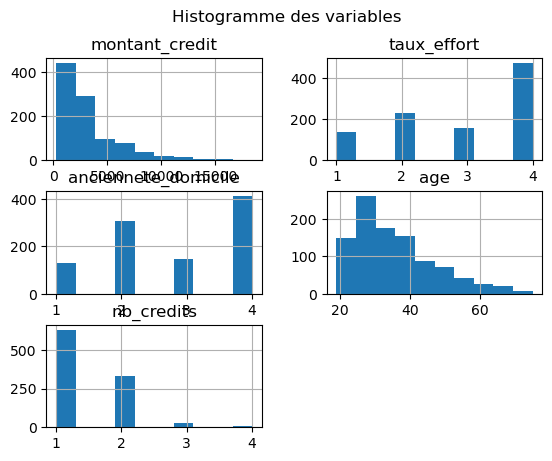

In [7]:
import matplotlib.pyplot as plt

columns = credit.columns[2:18]
credit[columns].hist()

plt.suptitle('Histogramme des variables')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

## Analyse des variables continues

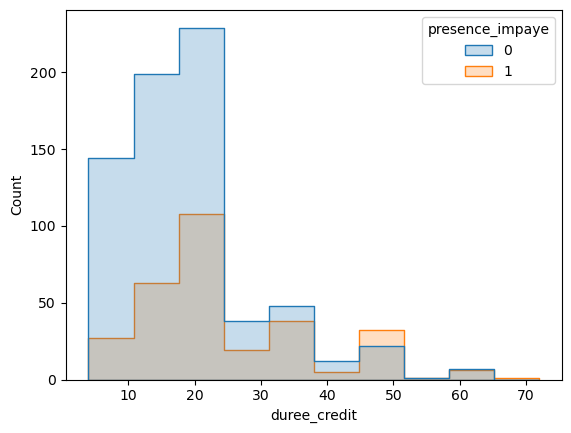

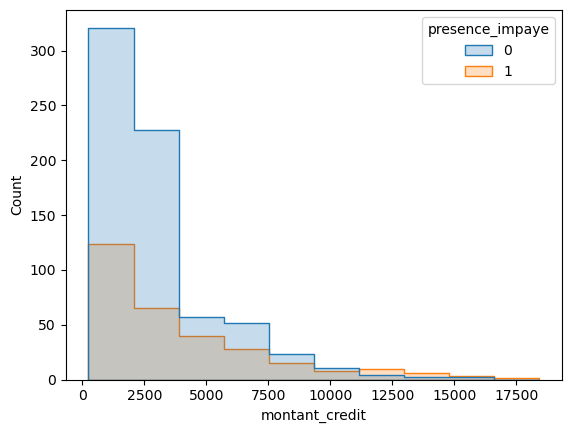

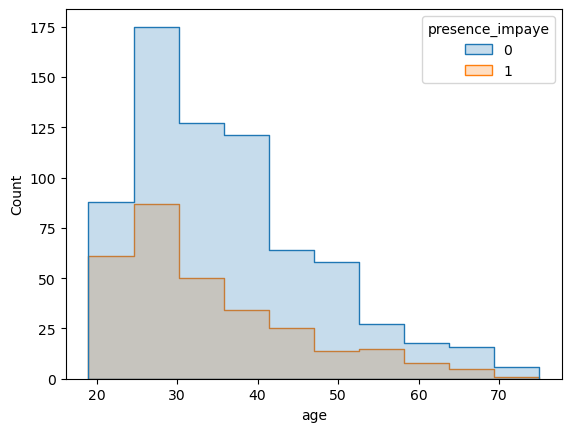

In [8]:
import seaborn as sns

sns.histplot(data=credit, x="duree_credit", hue="presence_impaye", element="step", bins=10)
plt.show()

sns.histplot(data=credit, x="montant_credit", hue="presence_impaye", element="step", bins=10)
plt.show()

sns.histplot(data=credit, x="age", hue="presence_impaye", element="step", bins=10)
plt.show()


La durée du crédit présente des pics prévisibles à 12, 24, 36, 18 et 60 mois. On constate assez nettement la plus forte proportion de crédits plus longs parmi ceux qui ont des impayés, particulièrement les crédits de 48 mois et plus.


Les crédits de très petits montants sont rares (le minimum est de 250 euros et 95% dépassent 700 euros). Ensuite on atteint une fréquence maximale autour de 1200 euros, qui ne fait que décroître ensuite. On constate la plus forte proportion de montants plus élevés parmi les crédits qui ont des impayés. La distribution présente une bonne régularité et pas d'anomalie apparente. L'écart entre la distribution des bons et mauvais dossiers semble plus faible pour le montant du crédit que pour sa durée.

  
L'âge des contractants est compris entre 19 et 75 ans. Il y a une distribution plus homogène pour les crédits sans impayé que pour les autres. Les impayés concernent majoritairement les contractants de moins de 35 ans lors de l'octroi du crédit. Passé cet âge, les histogrammes des bons et mauvais dossiers se ressemblent plus. 

In [9]:
pd.set_option('display.max_columns', None)
summary = credit.groupby('presence_impaye')[['age', 'duree_credit', 'montant_credit']].describe()
summary

age                                                       \
                 count       mean        std   min   25%   50%    75%   max   
presence_impaye                                                               
0                700.0  36.224286  11.381145  19.0  27.0  34.0  42.25  75.0   
1                300.0  33.963333  11.222379  19.0  25.0  31.0  40.00  74.0   

                duree_credit                                               \
                       count       mean        std  min   25%   50%   75%   
presence_impaye                                                             
0                      700.0  19.207143  11.079564  4.0  12.0  18.0  24.0   
1                      300.0  24.860000  13.282639  6.0  12.0  24.0  36.0   

                      montant_credit                                           \
                  max          count         mean          std    min     25%   
presence_impaye                                                                 
0                60.0          700.0  2985.457143  2401.472278  250.0  1375.5   
1                72.0          300.0  3938.126667  3535.818955  433.0  1352.5   

                                           
                    50%      75%      max  
presence_impaye                            
0                2244.0  3634.75  15857.0  
1                2574.5  5141.50  18424.0

Nous voyons que les 3 variables continues présentent chacune une liaison significative avec la variable à expliquer, que nous pouvons mesurer à l'aide d'un test ANOVA. Nous préférons néanmoins ici un test non-paramétrique, celui de Kruskal-Wallis. Ce type de test permet en effet de s'affranchir des hypothèses de normalité et d'homoscédasticité habituelles dans les tests paramétriques.
  
Sur nos données, ce test permet de confirmer la liaison plus faible pour le montant que pour la durée de crédit.
  

### Test de Kruskal Wallis

Le test de Kruskal-Wallis est une extension non paramétrique de l'ANOVA à un facteur. Il est utilisé pour comparer les médianes de trois groupes ou plus. 

La formule pour le test de Kruskal-Wallis est la suivante :

$$
H=\frac{12} {N(N+1)} ∑_{i=1}^g \: \frac{R_i^2}{n_i}−3(N+1)
$$
où :

* N est le nombre total d'observations pour tous les groupes.
* g est le nombre de groupes.
* R_i​ est la somme des rangs pour le ième groupe.
* n_i​ est le nombre d'observations dans le ième groupe.

Si l'hypothèse nulle est vraie (c'est-à-dire que tous les groupes ont la même médiane), alors la statistique H suit approximativement une distribution du chi-carré avec g−1 degrés de liberté (où g est le nombre de groupes). Si H est suffisamment grand, cela indiquerait que les groupes ont des médianes différentes.

In [10]:
from scipy.stats import kruskal

age_statistic, _ = kruskal(credit[credit['presence_impaye'] == 0]['age'],
                           credit[credit['presence_impaye'] == 1]['age'])
print('Le chi² de Kruskal sur la variable [age]')  
print(age_statistic)

duree_credit_statistic, _ = kruskal(credit[credit['presence_impaye'] == 0]['duree_credit'],
                                    credit[credit['presence_impaye'] == 1]['duree_credit'])
print('Le chi² de Kruskal sur la variable [duree_credit]') 
print(duree_credit_statistic)

montant_credit_statistic, _ = kruskal(credit[credit['presence_impaye'] == 0]['montant_credit'],
                                      credit[credit['presence_impaye'] == 1]['montant_credit'])
print('Le chi² de Kruskal sur la variable [montant_credit]') 
print(montant_credit_statistic)

Le chi² de Kruskal sur la variable [age]
12.57424162877921
Le chi² de Kruskal sur la variable [duree_credit]
42.263859684710084
Le chi² de Kruskal sur la variable [montant_credit]
7.575879598542001


 Le X² de Kruskal-Wallis présente l'avantage d'une lecture simple, et d'une grande généralité d'application, mais présente le même inconvénient que toute statistique du X², à savoir sa dépendance à l'effectif : plus la population est importante plus le X² est élevé. La probabilité associée n'offrant pas une grande lisibilité, une solution consiste à calculer un X² (ou plutôt un X) normalisé, à l'instar du V de Cramer.

$$
\chi^2 normalisé=\sqrt\frac{\chi^2  KW}{effectif}
$$

 On obtient une grandeur comparable d'un échantillon à l'autre, indépendamment de sa taille, et qui vaut ici 0.206 pour la durée de crédit, 0.112 pour l'âge et 0.087 pour le montant de crédit. A noter que l'effectif au dénominateur est celui des valeurs non manquantes de la variable, et non l'effectif total nrow(credit).

In [11]:
from scipy.stats import kruskal
import numpy as np

age_statistic, _ = kruskal(credit[credit['presence_impaye'] == 0]['age'].dropna(),
                           credit[credit['presence_impaye'] == 1]['age'].dropna())
age_sqrt_statistic = np.sqrt(age_statistic / sum(~credit['age'].isna()))
print('Le chi² de Kruskal sur la variable [age]')  
print(age_sqrt_statistic)

duree_credit_statistic, _ = kruskal(credit[credit['presence_impaye'] == 0]['duree_credit'].dropna(),
                                    credit[credit['presence_impaye'] == 1]['duree_credit'].dropna())
duree_credit_sqrt_statistic = np.sqrt(duree_credit_statistic / sum(~credit['duree_credit'].isna()))
print('Le chi² de Kruskal sur la variable [duree_credit]') 
print(duree_credit_sqrt_statistic)

montant_credit_statistic, _ = kruskal(credit[credit['presence_impaye'] == 0]['montant_credit'].dropna(),
                                      credit[credit['presence_impaye'] == 1]['montant_credit'].dropna())
montant_credit_sqrt_statistic = np.sqrt(montant_credit_statistic / sum(~credit['montant_credit'].isna()))
print('Le chi² de Kruskal sur la variable [montant_credit]') 
print(montant_credit_sqrt_statistic)

Le chi² de Kruskal sur la variable [age]
0.11213492599890193
Le chi² de Kruskal sur la variable [duree_credit]
0.2055817591244663
Le chi² de Kruskal sur la variable [montant_credit]
0.08703952894255576


## Discrétisation des variables continues

In [12]:

quantiles = credit['age'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
quantiles[0] -= 1
qage = pd.cut(credit['age'], quantiles)
tab = pd.crosstab(qage, credit['presence_impaye'])
prop_tab = tab.apply(lambda x: x / x.sum(), axis=1)
print(prop_tab)


presence_impaye         0         1
age                                
(18.0, 23.0]     0.600000  0.400000
(23.0, 26.0]     0.614815  0.385185
(26.0, 28.0]     0.702128  0.297872
(28.0, 30.0]     0.662338  0.337662
(30.0, 33.0]     0.685714  0.314286
(33.0, 36.0]     0.792793  0.207207
(36.0, 39.0]     0.756757  0.243243
(39.0, 45.0]     0.725664  0.274336
(45.0, 52.0]     0.800000  0.200000
(52.0, 75.0]     0.697917  0.302083


In [13]:
prop_tab = prop_tab.reset_index().rename(columns={'index': 'age'})
variable_name = ['age','presence_impaye_0','presence_impaye_1']
prop_tab.columns = variable_name

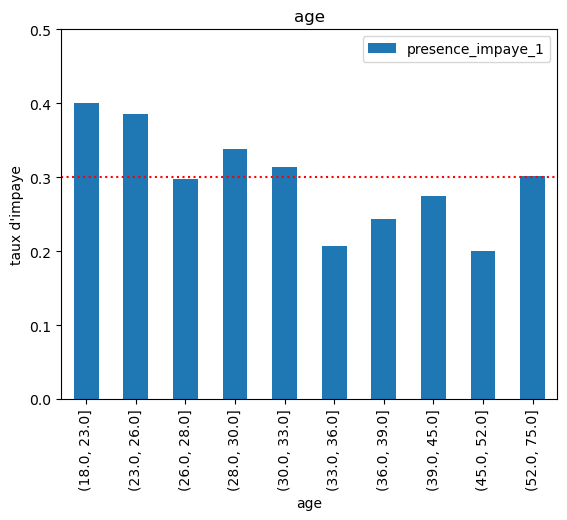

In [14]:
prop_tab.plot.bar(x='age', y='presence_impaye_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation = 'vertical')
plt.title('age')
plt.ylabel("taux d'impaye")
plt.axhline(y=0.3,linestyle=':', color='red')
plt.show()

Nous découpons l'âge en deux tranches : les moins de 25 ans et les plus de 25 ans.
Nous calculons ensuite le tableau croisé de l'âge discrétisé avec la variable à expliquer, et nous affichons les pourcentages en ligne de ce tableau.

In [15]:
age = pd.cut(credit['age'], bins=[0,25,float('Inf')], right=False)
tab = pd.crosstab(age, credit['presence_impaye'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)
prop_tab

presence_impaye,0,1
age,,
"[0.0, 25.0)",0.590604,0.409396
"[25.0, inf)",0.719154,0.280846


In [16]:
prop_tab = prop_tab.reset_index().rename(columns={"index": "age"})
variable_name = ['age','presence_impaye_0', 'presence_impaye_1']
prop_tab.columns = variable_name

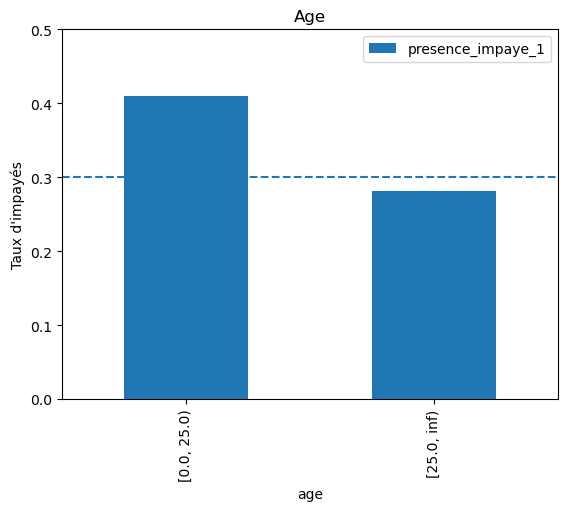

In [17]:
import matplotlib.pyplot as plt

prop_tab.plot.bar(x='age', y='presence_impaye_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation='vertical')
plt.title("Age")
plt.ylabel("Taux d'impayés")
plt.axhline(y=0.3, linestyle='--')
plt.show()

Nous faisons de même avec la durée du crédit

In [18]:
q = np.unique(np.percentile(credit['duree_credit'], np.arange(0, 101, 5)))
duree_credit = pd.cut(credit['duree_credit'], bins=[0, 15, 36, float('Inf')], right=False)
tab = pd.crosstab(duree_credit, credit['presence_impaye'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)
print(prop_tab)

presence_impaye         0         1
duree_credit                       
[0.0, 15.0)      0.790191  0.209809
[15.0, 36.0)     0.695464  0.304536
[36.0, inf)      0.517647  0.482353


In [19]:
prop_tab = prop_tab.reset_index().rename(columns={"index": "duree_credit"})
variable_name = ['duree_credit','presence_impaye_0', 'presence_impaye_1']
prop_tab.columns = variable_name

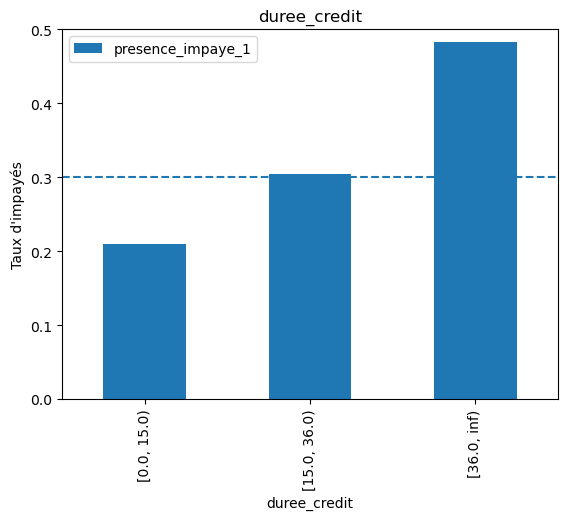

In [20]:
prop_tab.plot.bar(x='duree_credit', y='presence_impaye_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation='vertical')
plt.title("duree_credit")
plt.ylabel("Taux d'impayés")
plt.axhline(y=0.3, linestyle='--')
plt.show()

On divise le seuil à 4000 euros.

In [21]:
montant_credit = pd.cut(credit['montant_credit'], bins=[0, 4000, float('Inf')], right=False)
tab = pd.crosstab(montant_credit, credit['presence_impaye'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)
print(prop_tab)

presence_impaye         0         1
montant_credit                     
[0.0, 4000.0)    0.741379  0.258621
[4000.0, inf)    0.573171  0.426829


In [22]:
prop_tab = prop_tab.reset_index().rename(columns={"index": "montant_credit"})
variable_name = ['montant_credit','presence_impaye_0', 'presence_impaye_1']
prop_tab.columns = variable_name
print(prop_tab)

  montant_credit  presence_impaye_0  presence_impaye_1
0  [0.0, 4000.0)           0.741379           0.258621
1  [4000.0, inf)           0.573171           0.426829


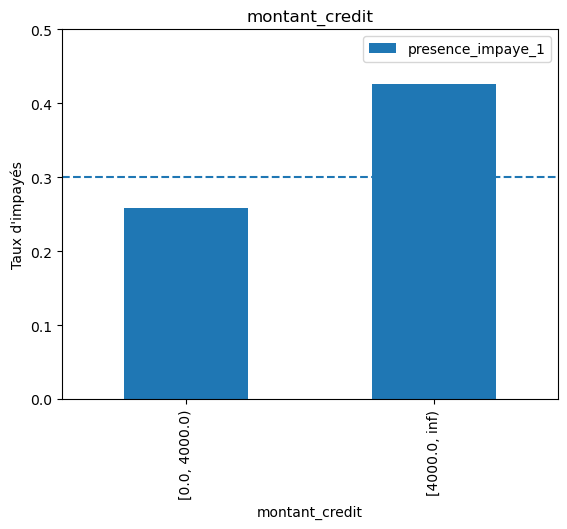

In [23]:
prop_tab.plot.bar(x='montant_credit', y='presence_impaye_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation='vertical')
plt.title("montant_credit")
plt.ylabel("Taux d'impayés")
plt.axhline(y=0.3, linestyle='--')
plt.show()

Nous pouvons constater que les demandeurs de moins de 25 ans, et les crédits longs ou importants, sont nettement plus risqués. 

Nous choissons donc de discrétiser les 3 variables continues. Ce choix est aussi effectué en constatant que seules 3 variables sur 19 ne sont pas découpées en classes. Cette mise en classes de l'ensemble des variables pourcurera plus de simplicité et de lisibilité, notamment dans la présentation des modèles sous la forme de grille de score.

## Liaison des variables explicatives avec la variable à expliquer
### Le V de Cramer
  Nous allons tout d'abord quantifier la liaison entre chacun des predicteurs et la variables à expliquer, en calculant le V de Cramer de chaque paire, puis en affichant la liste des variables explicatives par valeur décroissante du V de Cramer. Pour le calcul du V de Cramer, nous avons choisi d'appliquer la définition du V de Cramer, qui ici est simplement la racine carré du ratio (X² / effectif) puisque la variable à expliquer n'a que deux classes.
  Nous créons un dataframe intermédiaire, credit2, en excluant la clé, la cible et les 3 variables continues, afin d'avoir une idée du V de Cramer de l'âge, de la durée et du montant du crédit, et de leur importance par rapport à celui des autres variables.

Le V  de Cramér est une mesure de la force de l'association entre deux variables nominales (c'est-à-dire des variables catégorielles sans ordre particulier). Il est basé sur la statistique du chi-carré chi^2 et prend une valeur entre 0 et 1.

La formule pour le \( V \) de Cramér est:

$$
V = \sqrt{\frac{\chi^2/n}{\min(k-1,r-1)}}
$$
où:
- chi^2 est la valeur de la statistique du chi-carré pour le tableau de contingence des deux variables.
- n est le nombre total d'observations.
- k est le nombre de catégories pour la première variable.
- r est le nombre de catégories pour la deuxième variable.

L'interprétation du V de Cramer est la suivante :
- V = 0 : Pas d'association entre les deux variables.
- V = 1 : Association parfaite entre les deux variables.
- Des valeurs entre 0 et 1 indiquent le degré d'association, avec des valeurs proches de 1 indiquant une association plus forte.

Il est important de noter que le V de Cramer ne donne aucune indication sur la nature de la relation (par exemple, positive ou négative), mais seulement sur sa force.

In [24]:

cols_to_exclude = ['Cle', 'presence_impaye', 'duree_credit', 'montant_credit', 'age']
credit2 = credit[[col for col in credit.columns if col not in cols_to_exclude]].copy() 


credit2['age'] = age
credit2['duree_credit'] = duree_credit
credit2['montant_credit'] = montant_credit


In [25]:
credit2.to_csv('credit2.csv', index=False)
credit2.head()

,comptes,historique_credit,objet_credit,epargne,anciennete_emploi,taux_effort,situation_familiale,garanties,anciennete_domicile,bien,autres_credits,statut_domicile,nb_credits,type_emploi,nb_pers_charge,telephone,age,duree_credit,montant_credit
0,A11,A34,A43,A65,A75,4,A93,A101,4,A121,A143,A152,2,A173,1,A192,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)"
1,A12,A32,A43,A61,A73,2,A92,A101,2,A121,A143,A152,1,A173,1,A191,"[0.0, 25.0)","[36.0, inf)","[4000.0, inf)"
2,A14,A34,A46,A61,A74,2,A93,A101,3,A121,A143,A152,1,A172,2,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)"
3,A11,A32,A42,A61,A74,2,A93,A103,4,A122,A143,A153,1,A173,2,A191,"[25.0, inf)","[36.0, inf)","[4000.0, inf)"
4,A11,A33,A40,A61,A73,3,A93,A101,4,A124,A143,A153,2,A173,2,A191,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)"


Nous parcourons ensuite une boucle sur l'ensemble des variables du dataframe, en calculant le V de Cramer et la p-value du test X², lesquels sont enregistrés dans les 2e et 3e colonnes d'une matrice cramer, dont la première colonne contient le nom de la variable. Cette matrice est ensuite recopiée dans une matrice vcramer, en supprimant les éventuelles lignes non renseignée, et en copiant les variables dans l'ordre décroissant de leur V de Cramer avec la variable à expliquer.

In [26]:
from scipy.stats import chi2_contingency

cramer = []

for col_name in credit2.columns:
    contingency_table = pd.crosstab(credit2[col_name], credit['presence_impaye'])

    chi2, p, _, _ = chi2_contingency(contingency_table)
    cramer.append([col_name, np.sqrt(chi2 / len(credit2[col_name])), p])


vcramer = pd.DataFrame(cramer, columns=["variable", "V de Cramer", "p-value Chi2"])


print(vcramer)

               variable  V de Cramer  p-value Chi2
0               comptes     0.351740  1.218902e-26
1     historique_credit     0.248378  1.279187e-12
2          objet_credit     0.182637  1.157491e-04
3               epargne     0.189997  2.761214e-07
4     anciennete_emploi     0.135530  1.045452e-03
5           taux_effort     0.074005  1.400333e-01
6   situation_familiale     0.098006  2.223801e-02
7             garanties     0.081519  3.605595e-02
8   anciennete_domicile     0.027373  8.615521e-01
9                  bien     0.154012  2.858442e-05
10       autres_credits     0.113310  1.629318e-03
11      statut_domicile     0.134907  1.116747e-04
12           nb_credits     0.051684  4.451441e-01
13          type_emploi     0.043418  5.965816e-01
14       nb_pers_charge     0.000000  1.000000e+00
15            telephone     0.034243  2.788762e-01
16                  age     0.096825  2.199446e-03
17         duree_credit     0.202928  1.142610e-09
18       montant_credit     0.1

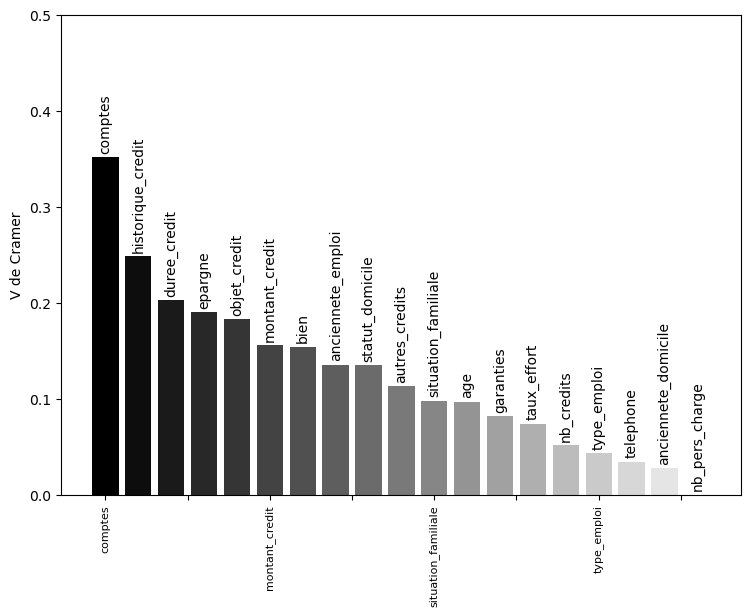

In [27]:
from matplotlib.ticker import MaxNLocator


plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom=0.15, left=0.1, right=0.95, top=0.95)


vcramer_sorted = vcramer.sort_values(by=vcramer.columns[1], ascending=False)

xlabels = vcramer_sorted.iloc[:,0].values
x_labels = vcramer_sorted.iloc[:, 0].values
y_values = vcramer_sorted.iloc[:, 1].astype(float).values

colors = [plt.cm.gray(i / len(vcramer_sorted)) for i in range(len(vcramer_sorted))]

bars = plt.bar(np.arange(len(vcramer_sorted)), y_values, color=colors)


plt.xticks(np.arange(len(vcramer_sorted)), x_labels, rotation=90)
plt.ylabel('V de Cramer')
plt.ylim(0, 0.5)
plt.tick_params(axis='x', labelsize=8)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))


for bar, label in zip(bars, x_labels):
    height = bar.get_height()
    plt.annotate(label,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points d'espace au-dessus de la barre
                 textcoords="offset points",
                 ha='center', va='bottom', rotation=90)

plt.show()


In [28]:
def ct(x):
    print("\n", credit.columns[x], "\n")
    table = pd.crosstab(credit.iloc[:, x], credit['presence_impaye'], normalize='index')
    margins = table.sum(axis=1)
    table = table.join(margins.rename('Total')).append(margins.rename('Total').rename(str))
    return table

exclude_columns = ["Cle", "presence_impaye", "duree_credit", "montant_credit", "age"]
for i in range(len(credit.columns)):
    if credit.columns[i] not in exclude_columns:
        print(ct(i))


 comptes 

                0         1  Total  A11  A12  A13  A14
comptes                                               
A11      0.507299  0.492701    1.0  NaN  NaN  NaN  NaN
A12      0.609665  0.390335    1.0  NaN  NaN  NaN  NaN
A13      0.777778  0.222222    1.0  NaN  NaN  NaN  NaN
A14      0.883249  0.116751    1.0  NaN  NaN  NaN  NaN
Total         NaN       NaN    NaN  1.0  1.0  1.0  1.0

 historique_credit 

                          0         1  Total  A30  A31  A32  A33  A34
historique_credit                                                    
A30                0.375000  0.625000    1.0  NaN  NaN  NaN  NaN  NaN
A31                0.428571  0.571429    1.0  NaN  NaN  NaN  NaN  NaN
A32                0.681132  0.318868    1.0  NaN  NaN  NaN  NaN  NaN
A33                0.681818  0.318182    1.0  NaN  NaN  NaN  NaN  NaN
A34                0.829352  0.170648    1.0  NaN  NaN  NaN  NaN  NaN
Total                   NaN       NaN    NaN  1.0  1.0  1.0  1.0  1.0

 objet_credit 

    

Pour le solde moyen sur un compte courant, un solde négatif accroît bien sûr le risque d'impayés. Un solde supérieur à 200 euros diminue le taux d'impayés de plus de moitié.

In [29]:
credit2['comptes'] = credit2['comptes'].replace({
    'A14': 'Pas de compte',
    'A11': 'CC < 0 euros',
    'A12': 'CC [0-200 euros]',
    'A13': 'CC > 200 euros'
})

Les taux d'impayés sont très liés à l'historique de remboursement du demandeur. La gradation est très nette depuis le demandeur qui a déjà eu des crédits qu'il a bien remboursés, ce qui atteste une bonne solvabilité, jusqu'à celui qui a eu des impayés dans la banque ou en a encore dans d'autres banques.   

In [30]:
credit2['objet_credit'] = credit2['objet_credit'].replace({
    'A40': 'Voiture neuve',
    'A41': 'Voiture occasion',
    'A42': 'Intérieur',
    'A44': 'Intérieur',
    'A45': 'Intérieur',
    'A43': 'Vidéo-HIFI',
    'A46': 'Etudes',
    'A48': 'Etudes',
    'A47': 'Vacances',
    'A49': 'Business',
    'A410': 'Autres'
})

  De même pour l'épargne, on a un taux d'imayés faible pour ceux qui n'ont pas de produit d'épargne (ce qui est différent d'avoir un produit d'épargne avec un encours nul), ce qui dénote tout simplement que leur épargne est dans un autre établissement bancaire. Le taux d'impayés augmente ensuite fortement, en prenant des valeurs proches en deçà de 100 euros et entre 100 et 500 euros, modalités que l'on rapproche donc. On peut hésiter à regrouper les 2 tranches "[500 - 1000 euros[" et ">= 1000 euros", car leurs taux d'impayés sont quelque peu différents, mais la petite taille de ces deux tranches poursse à les regrouper. Au vu des taux d'impayés, on pourrait mpême envisager de les regrouper avec la 1ère modalité.


In [31]:
credit2['epargne'] = credit2['epargne'].replace({
    'A65': 'Sans épargne',
    'A61': '< 500 euros',
    'A62': '< 500 euros',
    'A63': '> 500 euros',
    'A64': '> 500 euros'
})

  L'ancienneté à l'emploi suit une tendance générale logique, puisqu'un demandeur plus ancien présente moins de risque. Dans le détail, certains points sont un peu étonnants et viennent peut-être simplement d'un nombre d'impayés trop faible pour assurer des taux d'impayés parfaitement fiables. Mais ils peuvent peut-être aussi s'expliquer autrement. Ainsi une personne sans emploi est légèrement moins risquée qu'une personne travaillant depuis moins d'un an. Cela peut venir du fait que la catégorie "sans emploi" regroupe non seulement les demandeurs d'emploi, mais aussi des personnes n'ayant financièrement pas besoin de travailler, voire des retraités. Quant à la catégorie des personnes dans leur emploi depuis plus de 7 ans, elle est un peu plus risqué que celle qui y est depuis 4 à 7 ans. Cela peut s'expliquer par la présence des salariés âgés, parfois plus souvent victimes d'une perte d'emploi. Quoi qu'il en soit, pour éviter d'éventuelles incohérences et aussi pour s'assurer des modalités suffisamment importantes, on regroupera les 2 premières et les 2 dernières modalités.

In [32]:
credit2['anciennete_emploi'] = credit2['anciennete_emploi'].replace({
    'A71' : 'Sans emploi ou < 1 an',
    'A72' : 'Sans emploi ou < 1 an',
    'A73' : 'entre 1 et 4 ans',
    'A74' : 'depuis au moins 4 ans',
    'A75' : 'depuis au moins 4 ans'
})

  La vue du tableau sur le taux d'effort (taux d'endettement) corrobore un fait bien connu des spécialistes du "credit scoring" : cette variable qui semble populaire auprès de certains analystes de crédit est en réalité peu prédictive du risque d'impayés, du moins après l'exclusion probable avant scoring des demandeurs les plus endettés. Les taux d'impayés sont si proches qu'il est impossible que cette variable puisse être d'un quelconque intérêt, et nous l'ôtons de la sélection. 


In [33]:
# on enlève le taux d'effort

  Le V de Cramer de la situation familiale avec la variable à expliquer est lui aussi inférieur au seuil de 0.1 et le pouvoir discriminant de cette variable est faible, l'écart entre les taux d'impayés des différentes modalités s'amenuisant. Les deux dont les taux d'impayés sont les plus procjes seront regroupées, mais la variable aura du mal à jouer un rôle utile dans la prédiction. Contrairement à ce que l'on pourrait imaginer, la faiblesse de cette variable est souvent constatées en scoring. ...

In [34]:
credit2['situation_familiale'] = credit2['situation_familiale'].replace({
    'A91': 'Homme divorcé/séparé',
    'A92': 'Femme divorcée/séparée/mariée',
    'A93': 'Homme célibataire/marié/veuf',
    'A94': 'Homme célibataire/marié/veuf',
    'A95': 'Femme célibataire'
})

  L'existance d'un garant contribue à diminuer le taux d'impayés, contrairement à celle d'un co-emprunteur, mais cette situation est assez rare. On peut tout de même tester cette variable, qui pourrait apporter un complément d'information utile pour les individus concernés. Il faut ici prendre garde au petit nombre de dossier (52) pour lesquels un garant existe, qui doit faire considérer avec un peu de circonspection le taux d'impayés de 19.23%. Il est d'ailleurs conu que la présence d'un garant contribue généralement moins à faire baisser le risque d'ipayés qu'à augmenter le taux de récupération en cas d'impayé. Dans la terminalogie Bâle 2, nous diront que le garant diminue plus la LGD ("loss given default") que la PD ("probrability of default")

In [35]:
credit2['garanties'] = credit2['garanties'].replace({
    'A103': 'Avec garant',
    'A102': 'Sans garant',
    'A101': 'Sans garant'
})

  L'ancienneté au domicile influe de façon étonnante sur le risque d'impayés, puisque les plus récents dans leur logement sont les moins risqués. De surcroit, aucune tendance ne se dégage. On peut avoir des doutes sur la qualité du renseignement de cette variable, qui est généralement plus discriminante. Est-elle seulement mise à jour lors d'un déménagement, ou ne le serait-elle pas également lors de toute fiabilisation de l'adresse ou mise à jour du numéro de tel ?


In [36]:
# on enlève cette variable

  Le lien entre le bien de plus forte valeur détenu et le risque d'impayés est logique: l'absence de bien connu double le taux d'impayés par rapport à la définition d'un bien immobilier. Un demandeur dans ce dernier cas dispose d'une meilleure assise financière, surtout s'il a fini de rembourser dans son bien immobilier. Et quand cela n'est pas le cas, il sera plus attentif que la moyenne au bon remboursement de ses échéanches (craintes de se faire saisir son bien...). De toute de façon, si un crédit immoblier lui avait été consenti, c'est qu'il présentait une certaine fiabilité financière. Les deux modalités intermédiaires "assurance-vie" et "voiture ou autre" ont des taux d'impayés "gaux et sont donc regroupées pour former une modalité "bien non immobilier". 


In [37]:
credit2['bien'] = credit2['bien'].replace({
    'A121': 'Immobilier',
    'A124': 'Aucun bien',
    'A122': 'Non immobilier',
    'A123': 'Non immobilier'
})

  Quant à la détention de crédits dans d'autres établissements, il est logique qu'elle entraîne un plus grand risque d'impayés, car le client est plus endetté et l'on ne voit ni ne maîtrise ce qui ce passe dans l'autre établissement. Qu'il s'agisse d'un établissement bancaire classique ou d'un établissement spécialisé dans le crédit (notamment pour le crédit sur le lieu de vente) ne change rien au taux d'impayés, et l'on regroupe les deux premières modalités. 

In [38]:
credit2['autres_credits'] = credit2['autres_credits'].replace({
    'A143': 'Aucun crédit extérieur',
    'A142': 'Crédits extérieurs',
    'A141': 'Crédits extérieurs'
})

  Pour le statut au logement, le regroupement des modalités suit la même logique que précédemment en tenant compte des taux d'impayés.

In [39]:
credit2['statut_domicile'] = credit2['statut_domicile'].replace({
    'A152': 'propriétaire',
    'A151': 'Non propriétaire',
    'A153': 'Non propriétaire'
})

  Les variales suivantes sont très peu discriminantes et ne seront pas recodées :
  * nombre_credits : effectifs trop restreints 
  * type_emploi
  * nb_pers_charge : V de Cramer quasiment nul
  * telephone : très peu marqué

In [40]:

contingency_table = pd.crosstab(credit['comptes'], credit['presence_impaye'], margins=True, margins_name="Total")

# Effectuer le test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])

print("CrossTable: (comptes, presence_impaye)")
print("---------------------------------------")

# Afficher le tableau de contingence
print("Tableau de contingence :")
print(contingency_table)

print("\nStatistics for All Table Factors")

# Afficher le résultat du test du Chi2
print("\nRésultat du test du Chi2 :")
print("--------------------------------------------------")
print(f"Chi^2 = {chi2:.4f}, d.f. = {dof}, p-value = {p:.4f}")
print("--------------------------------------------------")

# Récupérer le nombre total d'observations
total = contingency_table.iloc[-1, -1]
print(f"Cramer's V                 {np.sqrt(chi2 / total):.4f}")

CrossTable: (comptes, presence_impaye)
---------------------------------------
Tableau de contingence :
presence_impaye    0    1  Total
comptes                         
A11              139  135    274
A12              164  105    269
A13               49   14     63
A14              348   46    394
Total            700  300   1000

Statistics for All Table Factors

Résultat du test du Chi2 :
--------------------------------------------------
Chi^2 = 123.7209, d.f. = 3, p-value = 0.0000
--------------------------------------------------
Cramer's V                 0.3517


In [41]:
credit2.describe()

,taux_effort,anciennete_domicile,nb_credits
count,1000.000000,1000.000000,1000.000000
mean,2.973000,2.845000,1.407000
std,1.118715,1.103718,0.577654
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,3.000000,3.000000,1.000000
75%,4.000000,4.000000,2.000000
max,4.000000,4.000000,4.000000


In [42]:
credit2['presence_impaye'] = credit['presence_impaye']
credit2

,comptes,historique_credit,objet_credit,epargne,anciennete_emploi,taux_effort,situation_familiale,garanties,anciennete_domicile,bien,autres_credits,statut_domicile,nb_credits,type_emploi,nb_pers_charge,telephone,age,duree_credit,montant_credit,presence_impaye
0,CC < 0 euros,A34,Vidéo-HIFI,Sans épargne,depuis au moins 4 ans,4,Homme célibataire/marié/veuf,Sans garant,4,Immobilier,Aucun crédit extérieur,propriétaire,2,A173,1,A192,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
1,CC [0-200 euros],A32,Vidéo-HIFI,< 500 euros,entre 1 et 4 ans,2,Femme divorcée/séparée/mariée,Sans garant,2,Immobilier,Aucun crédit extérieur,propriétaire,1,A173,1,A191,"[0.0, 25.0)","[36.0, inf)","[4000.0, inf)",1
2,Pas de compte,A34,Etudes,< 500 euros,depuis au moins 4 ans,2,Homme célibataire/marié/veuf,Sans garant,3,Immobilier,Aucun crédit extérieur,propriétaire,1,A172,2,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
3,CC < 0 euros,A32,Intérieur,< 500 euros,depuis au moins 4 ans,2,Homme célibataire/marié/veuf,Avec garant,4,Non immobilier,Aucun crédit extérieur,Non propriétaire,1,A173,2,A191,"[25.0, inf)","[36.0, inf)","[4000.0, inf)",0
4,CC < 0 euros,A33,Voiture neuve,< 500 euros,entre 1 et 4 ans,3,Homme célibataire/marié/veuf,Sans garant,4,Aucun bien,Aucun crédit extérieur,Non propriétaire,2,A173,2,A191,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Pas de compte,A32,Intérieur,< 500 euros,depuis au moins 4 ans,3,Femme divorcée/séparée/mariée,Sans garant,4,Immobilier,Aucun crédit extérieur,propriétaire,1,A172,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
996,CC < 0 euros,A32,Voiture occasion,< 500 euros,entre 1 et 4 ans,4,Homme divorcé/séparé,Sans garant,4,Non immobilier,Aucun crédit extérieur,propriétaire,1,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
997,Pas de compte,A32,Vidéo-HIFI,< 500 euros,depuis au moins 4 ans,4,Homme célibataire/marié/veuf,Sans garant,4,Non immobilier,Aucun crédit extérieur,propriétaire,1,A173,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
998,CC < 0 euros,A32,Vidéo-HIFI,< 500 euros,entre 1 et 4 ans,4,Homme célibataire/marié/veuf,Sans garant,4,Aucun bien,Aucun crédit extérieur,Non propriétaire,1,A173,1,A192,"[0.0, 25.0)","[36.0, inf)","[0.0, 4000.0)",1


### Création des échantillons d'apprentissage et de test

In [43]:
# mode sklearn et train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit2, test_size=0.3, random_state=42)  # Ici, test_size=0.3 signifie que 30% des données seront pour le test

In [44]:
train.head()

,comptes,historique_credit,objet_credit,epargne,anciennete_emploi,taux_effort,situation_familiale,garanties,anciennete_domicile,bien,autres_credits,statut_domicile,nb_credits,type_emploi,nb_pers_charge,telephone,age,duree_credit,montant_credit,presence_impaye
541,Pas de compte,A33,Voiture neuve,< 500 euros,depuis au moins 4 ans,4,Homme célibataire/marié/veuf,Sans garant,4,Aucun bien,Aucun crédit extérieur,Non propriétaire,2,A173,1,A192,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
440,Pas de compte,A32,Voiture neuve,< 500 euros,depuis au moins 4 ans,4,Homme célibataire/marié/veuf,Sans garant,4,Non immobilier,Aucun crédit extérieur,propriétaire,1,A174,1,A192,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
482,CC < 0 euros,A32,Intérieur,> 500 euros,depuis au moins 4 ans,4,Femme divorcée/séparée/mariée,Sans garant,4,Non immobilier,Aucun crédit extérieur,Non propriétaire,2,A173,1,A192,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
422,CC [0-200 euros],A34,Voiture neuve,< 500 euros,depuis au moins 4 ans,2,Homme célibataire/marié/veuf,Sans garant,3,Immobilier,Aucun crédit extérieur,propriétaire,2,A172,2,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
778,Pas de compte,A34,Voiture occasion,> 500 euros,depuis au moins 4 ans,4,Homme célibataire/marié/veuf,Sans garant,2,Non immobilier,Aucun crédit extérieur,propriétaire,2,A174,1,A192,"[25.0, inf)","[36.0, inf)","[4000.0, inf)",0


In [45]:
len(train)

700

## Liaisons entre les variables explicatives
Avec des variables ici toutes qualitatives ou discrètes, le V de Cramer est une mesure appropriée de liaison, mais nous pourrions adopter la même démarche avec des variables continues et des calculs de coef de coorelation.

In [46]:
cramer = np.empty((credit2.shape[1], credit2.shape[1]))
cramer[:] = np.nan

for i in range(credit2.shape[1]):
    for j in range(credit2.shape[1]):
        contingency_table = pd.crosstab(credit2.iloc[:, i], credit2.iloc[:, j])
        _, _, _, expected = chi2_contingency(contingency_table)
        cramer[i, j] = np.sqrt(chi2_contingency(contingency_table)[0] / (credit2.shape[0] * (min(contingency_table.shape) - 1)))

cramer_df = pd.DataFrame(cramer, columns=credit2.columns, index=credit2.columns)

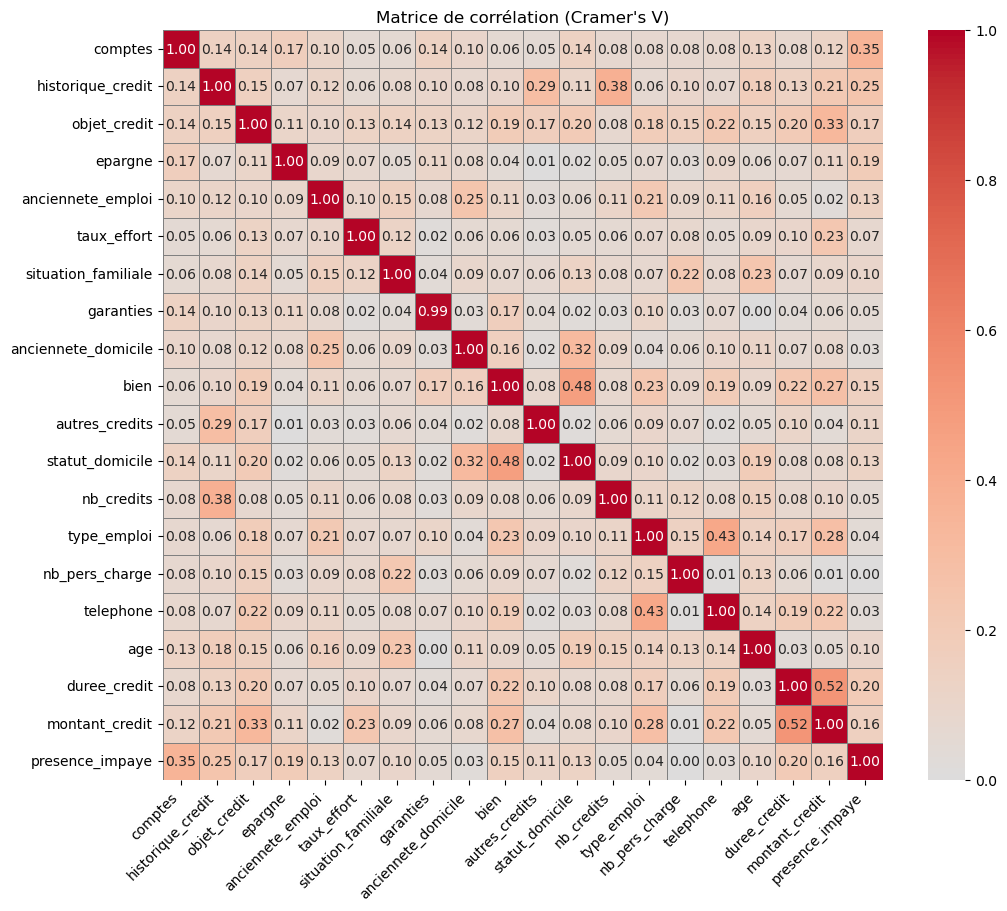

In [47]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

sns.heatmap(cramer_df, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, linecolor="grey")

for i in range(cramer.shape[0]):
    plt.text(i + 0.5, i + 0.5, "",  ha="center", va="center", color="black", fontsize=8)

variable_names = credit2.columns

plt.xticks(np.arange(cramer.shape[0]) + 0.5, variable_names, rotation=45, ha="right", fontsize=10)
plt.yticks(np.arange(cramer.shape[0]) + 0.5, variable_names, rotation=0, ha="right", fontsize=10)

plt.title("Matrice de corrélation (Cramer's V)")
plt.show()

Les liaisons les plus fortes sont aisément repérables par leur couleur plus foncée. La plus forte est entre la durée et le montant de crédit (V de Cramer = 0.52). Ensuite vient la liaison entre les biens et le statut domicile (V de Cramer = 0.48) puis entre la fourniture d'un numéro de tél et le type d'empoi (0.43), entre le nombre de crédits et l'historique de crédit (0.33), et entre le montant et l'objet de crédit (0.33). 

Entre des variables figurant dans un modèle de régression, on peut généralement considérer comme gênants les V de cramer dépassant 0.40 en valeur absolue. 


Un tableau croisé montre que le bien de plus haute valeur n'est lié au statut du domicile que par une modalité pour chaque variable : la modalité "aucun bien connu" (A124) avec la modalié "logement gratuit" (A153). Pour les autres modalités de la variables "Biens", la proportion de locataires (A151), propriétaires (A152) et logés à titre gratuit est presque la même. Cela ne permet pas d'exclure l'une des 2 variables à ce stade, mais nous devrons nous souvenir de cette liaison le cas échéant.

In [48]:

tab = pd.crosstab(credit['bien'], credit['statut_domicile'])
prop_tab = tab.div(tab.sum(axis=1), axis=0) * 100

print(prop_tab)

statut_domicile       A151       A152       A153
bien                                            
A121             19.503546  80.141844   0.354610
A122             19.827586  79.310345   0.862069
A123             18.072289  81.626506   0.301205
A124             11.688312  20.779221  67.532468


In [49]:
tab2 = pd.crosstab(credit2['bien'], credit2['statut_domicile'])
prop_tab2 = tab2.div(tab2.sum(axis=1), axis=0) * 100

print(prop_tab2)

statut_domicile  Non propriétaire  propriétaire
bien                                           
Aucun bien              79.220779     20.779221
Immobilier              19.858156     80.141844
Non immobilier          19.326241     80.673759


La 2ème paire de variables les plus liées est la durée et le montant du crédit. L'intensité de la liaison vient de ce que 95% des crédits d'au plus 15 mois sont d'un montant inférieur à 4000 euros, tandis que 83% des crédits de plus de 36 mois sont d'un montant supérieur à 4000 euros. Il est peu probable que les deux variables puissent figurer simultanément dans un modèle de régression, et la durée (V de Cramer = 0.20) est plus discriminante que le montant (V de Cramer = 0.16). On peut même se demander si le montant ne tire pas son pouvoir discriminant de son lien avec la durée, car le lien avec le risque d'impayés est plus évident pour la durée que pour le montant, dans la mesure où ces montants, bien plus bas que pour un crédit habitat, ne se traduisent pas par des mensualités d'ordres de grandeurs différents.


In [50]:
tab = pd.crosstab(duree_credit, montant_credit)
prop_tab = tab.div(tab.sum(axis=1), axis=0)
print(prop_tab)

montant_credit  [0.0, 4000.0)  [4000.0, inf)
duree_credit                                
[0.0, 15.0)          0.950954       0.049046
[15.0, 36.0)         0.766739       0.233261
[36.0, inf)          0.294118       0.705882


In [51]:
tab2 = pd.crosstab(duree_credit, montant_credit)
prop_tab2 = tab2.div(tab2.sum(axis=1), axis=0)
print(prop_tab2)

montant_credit  [0.0, 4000.0)  [4000.0, inf)
duree_credit                                
[0.0, 15.0)          0.950954       0.049046
[15.0, 36.0)         0.766739       0.233261
[36.0, inf)          0.294118       0.705882


Le tableau croisé avec la cible conforte la supériorité de la durée. Elle offre un découpage plus équilibré de la population puisqu'aucune modalité ne dépasse la moitié des demandes de crédit. De plus, l'une des modalités (<= 15 mois) est nettement moins risquée que la moyenne, tandis qu'une autre (>36 mois) est nettement plus risquée, ce qui permettra de mieux répartir les dossiers entre ceux qui sont plus ou moins risqués. S'il ne faut conserver que l'un des 2 variables, il s'agira de la durée de crédit.


In [52]:
tab = pd.crosstab(montant_credit, credit['presence_impaye'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)

tab_with_margins = pd.concat([prop_tab, tab.sum(axis=0)], axis=1)
tab_with_margins.index.name = 'montant_credit'

tab_with_margins.rename(columns={0: 'Total'}, inplace=True)

print(tab_with_margins)

                   Total         1  Total
montant_credit                           
[0.0, 4000.0)   0.741379  0.258621    NaN
[4000.0, inf)   0.573171  0.426829    NaN
0               0.741379  0.258621  700.0
1               0.741379  0.258621  300.0


 Les autres liaisons entre variables explicatives sont plus modérées.